**주제** | **뉴스기사와 거시경제 지표를 활용한 주가 지수 예측 - BERT 모델과 LSTM 을 활용해서**

1. **프로젝트 주제 선정 이유**
>
> 코로나19 펜데믹 상황은 전 세계 각국 여러 분야에 큰 영향을 주었고, 그 중에서도 경제는 크게 흔들렸다. 경제에 미친 영향을 알아보기 위해 경제 상황을 가장 잘 나타내는 수치화 된 지표인 주가를 사용하는 것이 적절하다고 판단했다. 우리의 일상생활 중에서 생산되는 다양한 비정형 데이터 중에서도 온라인 뉴스매체와 주가의 상관성에 대해 분석하려고 한다. 많은 선행연구처럼 주가 지수만이 아닌 국제 금 값과 환율지수처럼 거시경제 지표가 주가에 미치는 영향도 함께 분석할 예정이다. 단순히 다양한 경제 지표가 주가 지수에 미치는 영향의 정도를 파악하는 것에 그치지 않고, 2008년 리만 브라더스 경제 대공황과 비교해 코로나19 현재 상황의 주가 하락의 변동 폭과 시기의 유사성을 비교, 분석해보고자 한다. 따라서, 주가 지수는 리만 브라더스 사태와 비교할 수 있는 미국의 다우지수를 기준으로 분석할 예정이다. 더 나아가, 뉴스 헤드라인에 가장 많이 등장한 단어들의 특징 분석을 통해 경제 위기 당시의 뉴스 흐름에 대해 분석할 수 있는 프로젝트를 기획했다.


2. **프로젝트 진행 계획**
>
> 1) New York Times API 를 활용한 뉴스 헤드라인 크롤링
>
> 2) BERT 모델을 활용한 뉴스 헤드라인 데이터의 긍부정 분류
>
> 3) 뉴스 헤드라인 데이터 속 경제 용어 분석 및 시각화
>
> 4) 거시경제 지표에 대한 데이터 수집
>
> 5) LSTM 모델을 활용해 주가 예측 모델 설계 및 구현
>
> 6) 프로젝트 결과 분석


3. **기존의 연구 및 프로젝트와의 차별성**
>
> 기존의 주가 예측과 관련된 선행연구의 동향은 주가에 영향을 미치는 여러 거시경제 지수와 주가 변동의 상관관계를 이용한 상승 시기 및 변동 폭 예측 연구가 대부분이다. 그러나 본 프로젝트는 주가 지수의 단순 상승 예측이 아닌 이전의 특수한 상황-리만 브라더스 사태-과 비교하여 주가의 하락 시기 및 변동 폭을 예측한다는 점에서 기존의 연구와 차별성이 있다.


4. **사용한 데이터**
> 
> 1) New York Times API | "Economics" 뉴스 기사 크롤링
>
> 2) 다우지수 | Python "FinanceDataReader" Library
>
> 3) 국제 금 값 | Python "FinanceDataReader" Library
>
> 4) 달러•유로화 환율 | Python "FinanceDataReader" Library


**01. 준비 과정**
> Install Package
> - transformers
> - finance-datareader
> - quandl

> Import Library

> Connect Google Drive

In [ ]:
# install package

!pip install transformers
!pip install -q transformers

!pip install finance-datareader
!pip install -U finance-datareader #update

! pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 6.7 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 34.7 MB/s 
     |████████████████████████████████| 596 kB 61.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import library

import pandas as pd
import numpy as np
import random
import math

import re

import time
import datetime

from datetime import timedelta
from datetime import datetime

from tqdm import tqdm

import requests

import FinanceDataReader as fdr
import quandl

# 데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud  import WordCloud
from wordcloud  import ImageColorGenerator

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

# BERT 모델 학습 및 구현

import tensorflow as tf
import tensorflow_datasets as tfds

from transformers import BertTokenizer, TFBertForSequenceClassification

# LSTM 모델 학습 및 구현

import keras

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import text_to_word_sequence

from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import nltk
from nltk.corpus import stopwords


import warnings
warnings.filterwarnings('ignore')


In [ ]:
# connect Google Drive

from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


**02. NYT API 를 활용한 뉴스 헤드라인 크롤링**

> 데이터 수집 기간
>
> • 2008.08 ~ 2009.12
>
> • 2020.01 ~ 2020.12

> ✽ file_path → 파일경로 별도 설정 필요

In [ ]:
# Function | Get New York Times Api

news_df = pd.DataFrame(columns=('Title', 'Datetime', 'Snippet'))

def get_news(year, month):

    requestUrl = 'https://api.nytimes.com/svc/archive/v1/{}/{}.json?api-key=yzGu3PudW9FyXlUjM0OVnE4JE6OGLdH0'.format(year, month)
    requestHeaders = {
        'Accept': 'application/json'
    }
    response = requests.get(requestUrl, headers=requestHeaders)
    json = response.json()
    
    for i in range(0, len(json['response']['docs'])):
        doc = json['response']['docs'][i]
        if doc['news_desk'] == "Business" or doc['section_name'] == 'World' or doc['section_name'] == 'U.S.':
            title = doc['headline']['main']
            newsdate = doc['pub_date']
            snippet = doc['snippet']
            news_df.loc[i] = [title, newsdate, snippet]

    file_path =  '/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/'

    file_name = 'newyork_times_' + year + '_' + month + '.csv'

    file_full_path = file_path + file_name

    news_df.to_csv(file_full_path ,  index = False, encoding='utf-8-sig')

    return news_df
            

In [ ]:
# Sample

news_df = get_news('2008', '8')


In [ ]:
# 2008.09 ~ 2008.12

for i in range(9, 13):
  get_news('2008', str(i))


In [ ]:
# 2009.01 ~ 2009.12

for i in range(1, 13):
  get_news('2009', str(i))


In [ ]:
# 2020.01 ~ 2020.12

for i in range(1, 13):
  get_news('2020', str(i))


**03. 뉴스 헤드라인 데이터 전처리**
>
> 1) 주식 마감시간 16시를 기준으로 "date" column 재설정
>
> 2) 결측치 확인 및 해당 데이터 제거
>
> 3) "date" column 오름차순으로 데이터 정렬

> ✽ read_csv('  ') → 파일경로 별도 설정 필요

In [ ]:
# import news dataset

# 2008 ~ 2009

news_08_08 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2008_8.csv')
news_08_09 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2008_9.csv')
news_08_10 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2008_10.csv')
news_08_11 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2008_11.csv')
news_08_12 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2008_12.csv')

news_09_01 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_1.csv')
news_09_02 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_2.csv')
news_09_03 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_3.csv')
news_09_04 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_4.csv')
news_09_05 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_5.csv')
news_09_06 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_6.csv')
news_09_07 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_7.csv')
news_09_08 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_8.csv')
news_09_09 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_9.csv')
news_09_10 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_10.csv')
news_09_11 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_11.csv')
news_09_12 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2009_12.csv')

# 2020

news_20_01 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_1.csv')
news_20_02 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_2.csv')
news_20_03 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_3.csv')
news_20_04 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_4.csv')
news_20_05 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_5.csv')
news_20_06 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_6.csv')
news_20_07 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_7.csv')
news_20_08 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_8.csv')
news_20_09 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_9.csv')
news_20_10 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_10.csv')
news_20_11 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_11.csv')
news_20_12 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/news_raw/newyork_times_2020_12.csv')


In [ ]:
# Functions

# 데이터 전처리 | 데이터프레임 속 결측치 확인 후 제거

def pre_data(raw_df):

  df = raw_df.dropna(axis=0)

  return df


# 날짜 별 뉴스데이터 분류 | 주식 장 마감 시간인 16시를 기준으로 재분류 후 "date" 라는 새로운 column 생성

def classify_date(df):

  date_list = list(df['Datetime'])

  classified_date_list = []

  for date in date_list:

    if int(date[11:13]) < 16:
      classified_date = date[:10]

    else:
      day = date[:10]
      previous = datetime.strptime(day, '%Y-%m-%d')

      after = previous + relativedelta(days=1)

      classified_date = str(after)[:10]

    classified_date_list.append(classified_date)

  return classified_date_list


In [ ]:
# 월 별 데이터프레임 리스트

df_list = [news_08_08,
           news_08_09,
           news_08_10,
           news_08_11,
           news_08_12,
           news_09_01,
           news_09_02,
           news_09_03,
           news_09_04,
           news_09_05,
           news_09_06,
           news_09_07,
           news_09_08,
           news_09_09,
           news_09_10,
           news_09_11,
           news_09_12,
           news_20_01,
           news_20_02,
           news_20_03,
           news_20_04,
           news_20_05,
           news_20_06,
           news_20_07,
           news_20_08,
           news_20_09,
           news_20_10,
           news_20_11,
           news_20_12]

In [ ]:
# 데이터 전처리 과정을 거친 후 하나의 데이터프레임으로 수합

entire_news = pd.DataFrame(columns=['Date', 'Snippet'])


for i, df in enumerate(df_list):

  df = df.sort_values(by='Datetime')

  processed_df = pre_data(df)

  print('◎ processed df shape : ', processed_df.shape)
  print(f'news_{i+1}_dataframe processed')
  print()

  news_fraction = pd.DataFrame()

  date_col = classify_date(processed_df)

  news_fraction['Date'] = date_col

  snippet_list = list(processed_df['Snippet'])
  news_fraction['Snippet'] = snippet_list
  
  entire_news = pd.concat([entire_news,news_fraction], ignore_index=True)

entire_news.sort_values(by=['Date'])

entire_news.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/df_for_bert.csv')

◎ processed df shape :  (2239, 3)
news_1_dataframe processed

◎ processed df shape :  (3894, 3)
news_2_dataframe processed

◎ processed df shape :  (5273, 3)
news_3_dataframe processed

◎ processed df shape :  (5986, 3)
news_4_dataframe processed

◎ processed df shape :  (6522, 3)
news_5_dataframe processed

◎ processed df shape :  (7012, 3)
news_6_dataframe processed

◎ processed df shape :  (7212, 3)
news_7_dataframe processed

◎ processed df shape :  (7436, 3)
news_8_dataframe processed

◎ processed df shape :  (7654, 3)
news_9_dataframe processed

◎ processed df shape :  (8607, 3)
news_10_dataframe processed

◎ processed df shape :  (9792, 3)
news_11_dataframe processed

◎ processed df shape :  (10664, 3)
news_12_dataframe processed

◎ processed df shape :  (11260, 3)
news_13_dataframe processed

◎ processed df shape :  (11879, 3)
news_14_dataframe processed

◎ processed df shape :  (12591, 3)
news_15_dataframe processed

◎ processed df shape :  (12831, 3)
news_16_dataframe process

In [ ]:
# 데이터 형태 확인하기

entire_news.shape


(297612, 2)

In [ ]:
# 데이터 확인하기

entire_news.head()


,Date,Snippet
0,2008-08-01,A program started by John Edwards to pay a yea...
1,2008-08-01,This is not the first time that Paris Hilton a...
2,2008-08-01,The leaders of an effort to pressure Barack Ob...
3,2008-08-01,Lagging mobile phone sales continue to plague ...
4,2008-08-01,The Federal Reserve’s policy makers assume tha...


In [ ]:
# 데이터 확인하기

entire_news.tail()


,Date,Snippet
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep..."
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ..."
297610,2021-01-01,The hackers gained more access than the compan...
297611,2021-01-01,After a year punctuated by a pandemic and unem...


**04. BERT 모델을 활용한 뉴스 헤드라인 데이터 긍부정 라벨링**

>
> 1) tensorflow_datasets 의 샘플데이터 "imdb_reviews" 를 활용한 BERT 모델 학습
>
> 2) 크롤링한 뉴스 헤드라인 데이터의 긍부정 라벨링
>
> 3) 긍부정 레이블 하나의 컬럼으로 추가 | "label" column

> ✽ read_csv('  ') → 파일경로 별도 설정 필요
>
> ✽ to_csv('  ') → 파일경로 별도 설정 필요

In [ ]:
# 학습용 데이터와 테스트용 데이터 분리

(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', 
                                         split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                         as_supervised=True,
                                         with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHPGO55/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHPGO55/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHPGO55/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# Sample

for review, label in tfds.as_numpy(ds_train.take(5)):
  print(review.decode()[0:50], '\t', label)

This was an absolutely terrible movie. Don't be lu 	 0
I have been known to fall asleep during films, but 	 0
Mann photographs the Alberta Rocky Mountains in a  	 0
This is the kind of film for a snowy Sunday aftern 	 1
As others have mentioned, all the women that go nu 	 1


In [ ]:
# Tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Function

def convert_example_to_feature(review):
  return tokenizer.encode_plus(review,
                add_special_tokens = True,      # add [CLS], [SEP]
                max_length = max_length,        # max length of the text
                pad_to_max_length = True,       # add [PAD] tokens
                return_attention_mask = True,   # add attention mask to not focus on pad tokens
              )


In [ ]:
# Set Parameter

max_length = 512
batch_size = 6


In [ ]:
# Functions

def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      'input_ids': input_ids,
      'token_type_ids': token_type_ids,
      'attention_mask': attention_masks,
  }, label


def encode_examples(ds, limit=-1):
  # prepare list
  # to build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  if (limit > 0):
      ds = ds.take(limit)

  for review, label in tfds.as_numpy(ds):
    bert_input = convert_example_to_feature(review.decode())

    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [ ]:
# encoding train dataset
ds_train_encoded = encode_examples(ds_train).shuffle(10000).batch(batch_size)

# encoding test dataset
ds_test_encoded = encode_examples(ds_test).batch(batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
# Set Parameter for Model

# learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 2e-5

# multiple epochs might be better as long as we will not overfit the model
number_of_epochs = 1

# model initialization
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Set Optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# do not have one-hot vectors
# use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Model Compile

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [ ]:
# Model Fit

bert_history = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_test_encoded)


4167/4167 [==============================] - 4234s 1s/step - loss: 0.2477 - accuracy: 0.8974 - val_loss: 0.1883 - val_accuracy: 0.9276


In [ ]:
# save model

model.save('sentiment_anlysis_model')


INFO:tensorflow:Assets written to: sentiment_anlysis_model/assets


INFO:tensorflow:Assets written to: sentiment_anlysis_model/assets


In [ ]:
# load model

from tensorflow import keras

saved_model = keras.models.load_model('sentiment_anlysis_model')


In [ ]:
# Sample

test_sentences = ['This is a really good movie. I loved it and will watch again', 'I have been known to fall asleep during films']

label_list = []

for test_sentence in test_sentences:

  predict_input = tokenizer.encode(test_sentence, truncation=True, padding=True, return_tensors="tf")

  # test output

  test_output = model.predict(predict_input)[0]
  test_prediction = tf.nn.softmax(test_output, axis=1)

  # label => {0:negative, 1:positive}
  labels = ['Negative','Positive']

  label = tf.argmax(test_prediction, axis=1)
  label = label.numpy()
  
  label_elem = label[0]

  label_str = str(label_elem)

  label_list.append(label_str)

  # Prediction 확인
  print(test_sentence, '| label : ', label_str)


This is a really good movie. I loved it and will watch again | label :  1
I have been known to fall asleep during films | label :  0


In [ ]:
# import dataset

df = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/df_for_bert.csv')


In [ ]:
# 데이터 형태 확인

print('◎ 데이터 형태 : ', df.shape)


◎ 데이터 형태 :  (297612, 3)


In [ ]:
# 첫 번째 index column 제거

del df['Unnamed: 0']


In [ ]:
# 결측값 확인

df.isnull().sum()


Date       0
Snippet    0
dtype: int64

In [ ]:
# 데이터 확인

df.head()


,Date,Snippet
0,2008-08-01,A program started by John Edwards to pay a yea...
1,2008-08-01,This is not the first time that Paris Hilton a...
2,2008-08-01,The leaders of an effort to pressure Barack Ob...
3,2008-08-01,Lagging mobile phone sales continue to plague ...
4,2008-08-01,The Federal Reserve’s policy makers assume tha...


In [ ]:
# 데이터 확인

df.tail()


,Date,Snippet
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep..."
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ..."
297610,2021-01-01,The hackers gained more access than the compan...
297611,2021-01-01,After a year punctuated by a pandemic and unem...


In [ ]:
# 데이터셋 분할 | 크기가 너무 커서 분할 후 모델 적용

df_1 = df[:40000]
df_2 = df[40000:80000]
df_3 = df[80000:120000]
df_4 = df[120000:160000]
df_5 = df[160000:200000]
df_6 = df[200000:240000]
df_7 = df[240000:270000]
df_8 = df[270000:]


In [ ]:
# Function
# Sentimental Analysis using BERT | 뉴스 헤드라인 데이터 감성 분석 후 레이블링

def get_posneg_label_list(sentences):

  label_list = []

  for i in range(len(sentences)):
    
    sent = sentences[i]

    predict_label = tokenizer.encode(sent, truncation=True, padding=True, return_tensors='tf')

    # predict label posneg

    output = model.predict(predict_label)[0]

    prediction = tf.nn.softmax(output, axis=1)

    # label => {0:negative, 1:positive}
    labels = ['Negative','Positive']

    label = tf.argmax(prediction, axis=1)
    label = label.numpy()
    
    label_elem = label[0]

    label_str = str(label_elem)

    label_list.append(label_str)

  # result 반환
  return label_list


In [ ]:
# 학습된 BERT 모델을 활용한 뉴스 헤드라인 긍부정 레이블 예측

df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]

i = 0

for frac_df in df_list:

  i += 1

  sentences = list(frac_df['Snippet'])

  posneg_label_list = get_posneg_label_list(sentences=sentences)

  print(f'df_{i}')
  print('◎ sample posneg label list : \n', posneg_label_list)
  print()

  sample_df = pd.DataFrame(posneg_label_list, columns=['posneg'])

  sample_df.to_csv(f'/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/posneg_fractions/sample_posneg_{i}.csv')



df_4
◎ sample posneg label list : 
 ['1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1'

In [ ]:
# import fractions of posneg label dataframe
# 하나의 긍부정 레이블 리스트로 수합

final_df = pd.DataFrame(columns=['posneg_sample'])

for i in range(8):

  label_df = pd.read_csv(f'/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/posneg_fractions/sample_posneg_{i+1}.csv')

  del label_df['Unnamed: 0']

  final_df = pd.concat([final_df,label_df], ignore_index=True)


In [ ]:
# 생성된 긍부정 레이블 수 확인

final_label_list = list(final_df['posneg'])

print('◎ row count of final label list : ', len(final_label_list))


◎ row count of final label list :  297612


In [ ]:
# 기존 데이터프레임에 긍부정 레이블 추가 | "posneg" oolumn

df['posneg'] = final_label_list


In [ ]:
# "posneg" column 데이터 타입 변환 | str

df['posneg'] = df['posneg'].astype(str)

df = df.replace({'posneg':'0.0'},'0')
df = df.replace({'posneg':'1.0'},'1')


In [ ]:
# 데이터 형태 확인

df.shape


(297612, 3)

In [ ]:
# 데이터 확인

df.head()


,Date,Snippet,posneg
0,2008-08-01,A program started by John Edwards to pay a yea...,1
1,2008-08-01,This is not the first time that Paris Hilton a...,0
2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1
3,2008-08-01,Lagging mobile phone sales continue to plague ...,0
4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1


In [ ]:
# 데이터 확인

df.tail()


,Date,Snippet,posneg
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep...",0
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...,1
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ...",1
297610,2021-01-01,The hackers gained more access than the compan...,0
297611,2021-01-01,After a year punctuated by a pandemic and unem...,1


In [ ]:
# save csv files

df.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/after_sentiment_analysis.csv')


   posneg   count
0       0   66051
1       1  231561



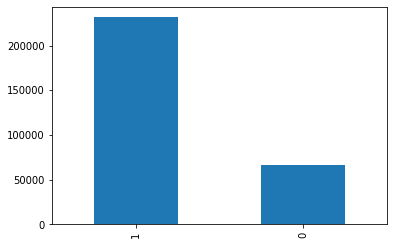

In [ ]:
# 뉴스 헤드라인 데이터의 긍부정 label 분포 확인

print(df.groupby('posneg').size().reset_index(name = 'count'))
print()

# bar chart

df['posneg'].value_counts().plot(kind = 'bar')


**05. 뉴스 헤드라인 데이터 속 경제 용어 분석 및 시각화**

> 1) 가장 많이 등장한 단어들의 워드클라우드 생성
>
> 2) tfidf 를 활용한 가중치가 높은 단어들의 워드클라우드 생성

> ✽ read_csv('  ') → 파일경로 별도 설정 필요
>
> ✽ plt.imread('  ') → 파일경로 별도 설정 필요

In [ ]:
# import dataset

df = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/after_sentiment_analysis.csv')


In [ ]:
# 데이터 확인

df.head()


,Unnamed: 0,Date,Snippet,posneg
0,0,2008-08-01,A program started by John Edwards to pay a yea...,1
1,1,2008-08-01,This is not the first time that Paris Hilton a...,0
2,2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1
3,3,2008-08-01,Lagging mobile phone sales continue to plague ...,0
4,4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1


In [ ]:
# 불필요한 column 제거

del df['Unnamed: 0']


In [ ]:
# 데이터 확인

df.shape


(297612, 3)

In [ ]:
# 뉴스 헤드라인 데이터 중복값 확인 및 제거

df.drop_duplicates(['Snippet'])


,Date,Snippet,posneg
0,2008-08-01,A program started by John Edwards to pay a yea...,1
1,2008-08-01,This is not the first time that Paris Hilton a...,0
2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1
3,2008-08-01,Lagging mobile phone sales continue to plague ...,0
4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1
...,...,...,...
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep...",0
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...,1
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ...",1
297610,2021-01-01,The hackers gained more access than the compan...,0


In [ ]:
# 데이터 확인

df.shape


(297612, 3)

In [ ]:
# 데이터 전처리 후 새로운 column 으로 추가 | "headline_after_p" column

headlines = list(df['Snippet'])

headline_after_p_list = []

for headline in headlines:

  headline_after_p = headline.lower()

  headline_after_p_list.append(headline_after_p)

df['headline_after_p'] = headline_after_p_list


In [ ]:
# 뉴스 헤드라인 데이터 중복값 확인 및 제거

df.drop_duplicates(['headline_after_p'])


,Date,Snippet,posneg,headline_after_p
0,2008-08-01,A program started by John Edwards to pay a yea...,1,a program started by john edwards to pay a yea...
1,2008-08-01,This is not the first time that Paris Hilton a...,0,this is not the first time that paris hilton a...
2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1,the leaders of an effort to pressure barack ob...
3,2008-08-01,Lagging mobile phone sales continue to plague ...,0,lagging mobile phone sales continue to plague ...
4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1,the federal reserve’s policy makers assume tha...
...,...,...,...,...
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep...",0,"up to 700 people lacking winter clothes, sleep..."
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...,1,the “billionaire millennial” lin qi was workin...
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ...",1,"make yourself a grown-up granita. for dinner, ..."
297610,2021-01-01,The hackers gained more access than the compan...,0,the hackers gained more access than the compan...


In [ ]:
# 데이터 확인

df.shape


(297612, 4)

In [ ]:
# 데이터 확인

df.head()


,Date,Snippet,posneg,headline_after_p
0,2008-08-01,A program started by John Edwards to pay a yea...,1,a program started by john edwards to pay a yea...
1,2008-08-01,This is not the first time that Paris Hilton a...,0,this is not the first time that paris hilton a...
2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1,the leaders of an effort to pressure barack ob...
3,2008-08-01,Lagging mobile phone sales continue to plague ...,0,lagging mobile phone sales continue to plague ...
4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1,the federal reserve’s policy makers assume tha...


1. 단어 빈도 수에 따른 워드클라우드

In [ ]:
# 뉴스 헤드라인 토큰화 및 stopwords(불용어) 제거

nltk.download('stopwords')

headline_list = list(df['headline_after_p'])

tokenized_list = []

stop_words = stopwords.words('english')

for headline in headline_list:

  # word_tokens = word_tokenize(headline)

  word_tokens = text_to_word_sequence(headline)

  for w in word_tokens:
    
    if w not in stop_words:
      tokenized_list.append(w)

print('◎ 토큰화 된 단어의 리스트 | ', tokenized_list[:100])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
◎ 토큰화 된 단어의 리스트 |  ['program', 'started', 'john', 'edwards', 'pay', 'year’s', 'college', 'tuition', 'graduate', 'high', 'school', 'north', 'carolina', 'closed', 'first', 'time', 'paris', 'hilton', 'britney', 'spears', 'find', 'center', 'unauthorized', 'video', 'record', 'one', 'asked', 'permission', 'feature', 'withering', 'mccain', 'campaign', 'ad', 'leaders', 'effort', 'pressure', 'barack', 'obama', 'picking', 'hillary', 'rodham', 'clinton', 'running', 'mate', 'ended', 'bid', 'lagging', 'mobile', 'phone', 'sales', 'continue', 'plague', 'motorola', 'mobile', 'leader', 'readies', 'plan', 'spin', 'cellphone', 'operations', 'separate', 'company', 'federal', 'reserve’s', 'policy', 'makers', 'assume', 'people', 'eventually', 'demand', 'get', 'higher', 'pay', 'differ', 'sharply', 'quickly', 'pressure', 'could', 'emerge', 'two', 'canadian', 'tobacco', 'companies', 'agreed', 

In [ ]:
# 토큰화 된 단어 리스트의 길이

print('◎ 토큰화 된 단어의 수 | ', len(tokenized_list))


◎ 토큰화 된 단어의 수 |  4415883


In [ ]:
# 토큰화 된 단어의 빈도 수 세기

counts = Counter(tokenized_list)


# 가장 많이 나온 단어 순서로 100개 단어 추출

common_words = counts.most_common(100)
print('◎ 가장 많이 등장한 단어의 리스트 | ', common_words)


◎ 가장 많이 등장한 단어의 리스트 |  [('said', 31868), ('new', 29620), ('president', 25722), ('would', 14619), ('year', 13180), ('government', 12917), ('one', 12854), ('two', 12849), ('obama', 12756), ('billion', 12513), ('million', 12028), ('financial', 11408), ('american', 11140), ('company', 10849), ('first', 10555), ('people', 10358), ('bank', 10313), ('may', 10032), ('group', 9973), ('federal', 9626), ('former', 9600), ('state', 9578), ('u', 9498), ('last', 9216), ('”', 8929), ('reported', 8872), ('could', 8789), ('—', 8542), ('health', 8359), ('house', 8286), ('states', 8181), ('officials', 7699), ('united', 7598), ('news', 7598), ('time', 7566), ('chief', 7535), ('public', 7442), ('york', 7404), ('many', 7394), ('years', 7219), ('deal', 7209), ('percent', 7195), ('business', 6986), ('companies', 6937), ('monday', 6721), ('tuesday', 6671), ('fund', 6659), ('1', 6593), ('week', 6471), ('court', 6395), ('wednesday', 6265), ('economic', 6203), ('money', 6089), ('times', 6019), ('thursday', 5984),

In [ ]:
# "common_words" 딕셔너리 생성

common_words_dict = {}

for i in range(len(common_words)):

  key = common_words[i][0]
  value = common_words[i][1]

  common_words_dict[key] = value

print('◎ 가장 많이 등장한 단어의 딕셔너리 | ', common_words_dict)


◎ 가장 많이 등장한 단어의 딕셔너리 |  {'said': 31868, 'new': 29620, 'president': 25722, 'would': 14619, 'year': 13180, 'government': 12917, 'one': 12854, 'two': 12849, 'obama': 12756, 'billion': 12513, 'million': 12028, 'financial': 11408, 'american': 11140, 'company': 10849, 'first': 10555, 'people': 10358, 'bank': 10313, 'may': 10032, 'group': 9973, 'federal': 9626, 'former': 9600, 'state': 9578, 'u': 9498, 'last': 9216, '”': 8929, 'reported': 8872, 'could': 8789, '—': 8542, 'health': 8359, 'house': 8286, 'states': 8181, 'officials': 7699, 'united': 7598, 'news': 7598, 'time': 7566, 'chief': 7535, 'public': 7442, 'york': 7404, 'many': 7394, 'years': 7219, 'deal': 7209, 'percent': 7195, 'business': 6986, 'companies': 6937, 'monday': 6721, 'tuesday': 6671, 'fund': 6659, '1': 6593, 'week': 6471, 'court': 6395, 'wednesday': 6265, 'economic': 6203, 'money': 6089, 'times': 6019, 'thursday': 5984, 'executive': 5957, 'senator': 5754, 'day': 5688, 'say': 5684, 'election': 5659, 'three': 5562, 'care': 5533,

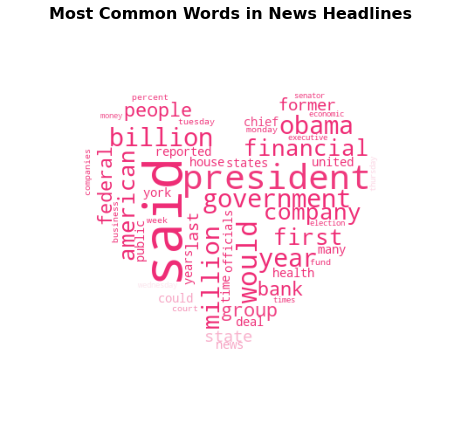

In [ ]:
# 뉴스 헤드라인 속 빈도 수가 높은 단어들의 워드클라우드 생성

cloud_img = plt.imread('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/img/heart.jpg')


wordcloud = WordCloud(width = 300,
                      height = 300,
                      max_words=50,
                      random_state=0,
                      background_color='white',
                      color_func = ImageColorGenerator(cloud_img),
                      mask = cloud_img)



cloud = wordcloud.generate_from_frequencies(common_words_dict) 

fig = plt.figure(figsize=(8, 8))
 

plt.axis('off')

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

plt.title('Most Common Words in News Headlines', fontdict=title_font)
plt.imshow(cloud)

plt.show()


2. TfidfVectorizer 를 활용한 워드클라우드

In [ ]:
# 데이터가 너무 커서 tfidf 값을 계산할 sample dataset 추출

sample1 = list(df['headline_after_p'][40000:41000])
sample2 = list(df['headline_after_p'][200000:201000])


In [ ]:
# 데이터 확인

print('◎ 2008년 뉴스 헤드라인 샘플 | ', len(sample1))
print('◎ 2020년 뉴스 헤드라인 샘플 | ', len(sample2))


◎ 2008년 뉴스 헤드라인 샘플 |  1000
◎ 2020년 뉴스 헤드라인 샘플 |  1000


In [ ]:
# 데이터 확인

print('◎ 2008년 뉴스 헤드라인 | \n', sample1)
print()
print('◎ 2020년 뉴스 헤드라인 | \n', sample2)


◎ 2008년 뉴스 헤드라인 | 
 ['so far, the deepening recession has not slowed sales of virtual goods, which executives attribute to people spending more time at home.', 'not only may hiram bingham not be quite the heroic pioneer that he has been portrayed as, but it may be that the lost city of the incas was never really lost.', 'economic events for the week of dec. 8, 2008.', 'treasury’s schedule of financing this week.', 'a battle over development on molokai, in the hawaiian islands, ended abruptly when the owners of molokai ranch, which covers a third of the island, shut down operations and construction plans.', 'wall street extended a global rally amid redoubled efforts to try to revive the economy, including signs that the government will bail out detroit’s troubled automakers.', 'a raid on a militant group’s camp appears to be pakistan’s first concrete action against the suspected mumbai attackers.', 'iran said that it would not abandon its nuclear program and urged president-elect barack

In [ ]:
# Function

# WordCloud 함수 | 뉴스 헤드라인 속 tfidf 값이 높은 단어들의 워드클라우드 생성 함수

def make_wc(cloud_img, score):

  wordcloud = WordCloud(width = 300,
                      height = 300,
                      max_words=50,
                      random_state=0,
                      background_color='white',
                      color_func = ImageColorGenerator(cloud_img),
                      mask = cloud_img)
  
  cloud = wordcloud.generate_from_frequencies(score)
  
  fig = plt.figure(figsize=(8, 8))

  plt.axis('off')

  title_font = {
      'fontsize': 16,
      'fontweight': 'bold'
  }

  plt.title('Words from Tfidf Values in News Headlines', fontdict=title_font)
  plt.imshow(cloud)

  plt.show()


In [ ]:
# 뉴스 헤드라인 데이터를 추출할 랜덤 넘버 생성 | numpy array 를 활용한 random index list

num_list = []

rand_num = random.randint(0, 999)

for i in range(20):

  while rand_num in num_list:
    rand_num = random.randint(0, 999)

  num_list.append(rand_num)

num_list.sort()

print("◎ random number : ", num_list)
print()


◎ random number :  [5, 89, 179, 212, 248, 250, 278, 281, 363, 480, 569, 652, 680, 726, 740, 794, 815, 866, 884, 928]



> 2008 년 뉴스 헤드라인 데이터 분석

In [ ]:
# 뉴스 헤드라인 속 가중치가 높은 단어 분석 | sklearn 의 tfidf 활용

# 시작 시간 기록
start = time.time()


# tfidf 값 계산 

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf = tfidf_vectorizer.fit(sample1)
tfidf_matrix = tfidf.transform(sample1).toarray()


# 경과 시간 계산 
processing_time = time.time() - start
times = str(datetime.timedelta(seconds = processing_time))
print(times)


0:00:00.105002


In [ ]:
# "Article dataframe" vocabulary 분석
  
print('◎ 사용된 전체 단어 수 = ', len(list(tfidf_vectorizer.vocabulary_)))
print()  
  
print('◎ 사용된 전체 단어 리스트 = ', tfidf_vectorizer.vocabulary_)
print()

print('◎ tfidf 값이 높은 순서대로 정렬한 단어 리스트 = ', sorted(tfidf_vectorizer.vocabulary_.items(), reverse=True))
print()

◎ 사용된 전체 단어 수 =  5114

◎ 사용된 전체 단어 리스트 =  {'far': 1767, 'deepening': 1281, 'recession': 3731, 'slowed': 4274, 'sales': 4017, 'virtual': 4914, 'goods': 2020, 'executives': 1693, 'attribute': 416, 'people': 3314, 'spending': 4346, 'time': 4670, 'home': 2194, 'hiram': 2174, 'bingham': 568, 'quite': 3657, 'heroic': 2155, 'pioneer': 3363, 'portrayed': 3444, 'lost': 2740, 'city': 908, 'incas': 2291, 'really': 3713, 'economic': 1534, 'events': 1675, 'week': 4991, 'dec': 1260, '2008': 40, 'treasury': 4736, 'schedule': 4051, 'financing': 1827, 'battle': 512, 'development': 1364, 'molokai': 2935, 'hawaiian': 2124, 'islands': 2445, 'ended': 1606, 'abruptly': 109, 'owners': 3220, 'ranch': 3682, 'covers': 1148, 'island': 2444, 'shut': 4225, 'operations': 3160, 'construction': 1074, 'plans': 3382, 'wall': 4947, 'street': 4444, 'extended': 1726, 'global': 2001, 'rally': 3678, 'amid': 281, 'redoubled': 3752, 'efforts': 1556, 'try': 4766, 'revive': 3914, 'economy': 1538, 'including': 2298, 'signs': 423

◎ News Headline :  wall street extended a global rally amid redoubled efforts to try to revive the economy, including signs that the government will bail out detroit’s troubled automakers.



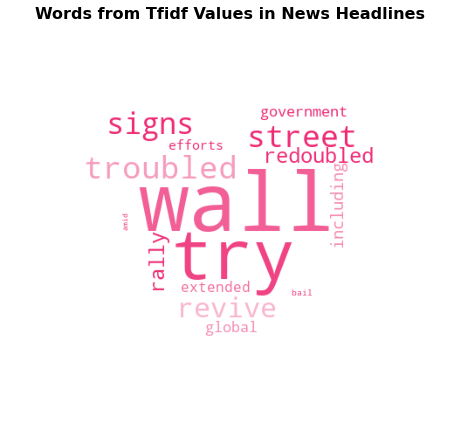

◎ News Headline :  a large demonstration in central athens turned violent thursday when rioters threw rocks and firebombs at the police and tried to burn down the city’s main christmas tree.



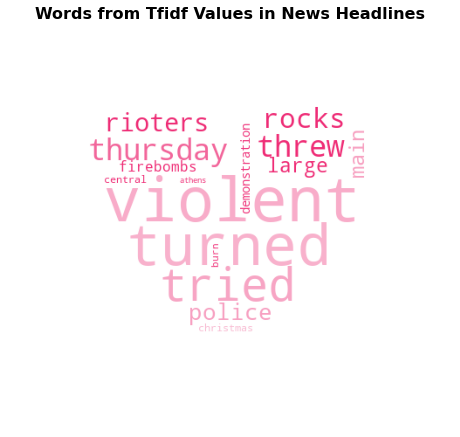

◎ News Headline :  final numbers are not due until jan. 14, but interim data shows that customer traffic for the full holiday season plummeted 16 percent, taking sales down 2.3 percent.



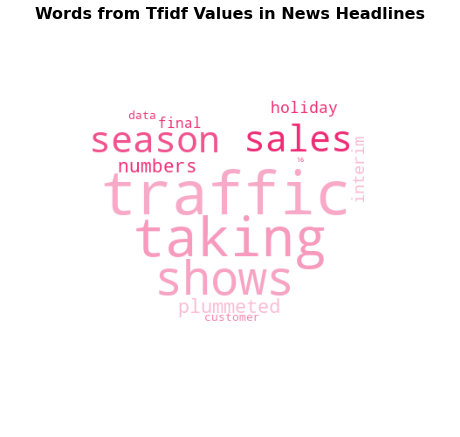

◎ News Headline :  seeking to fill a diplomatic vacuum in the middle east left by the departing bush administration, the missions will try to broker a cease-fire in gaza and offer more humanitarian aid.



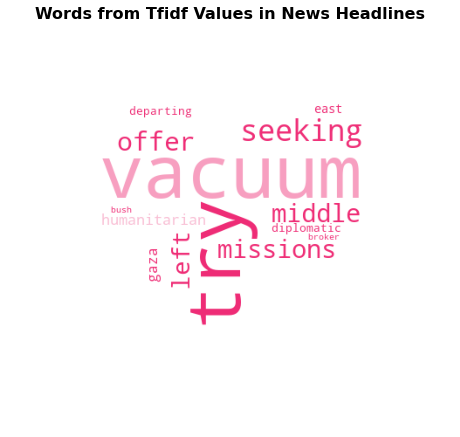

◎ News Headline :  the institute for supply management said its services sector index rose as new orders and employment picked up. another report showed pending home sales fell to a 7-year low.



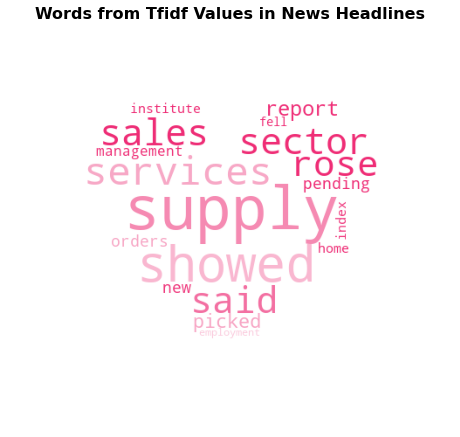

◎ News Headline :  trading volume was light and market analysts said that investors seemed to be biding their time before the release of the december employment numbers on friday.



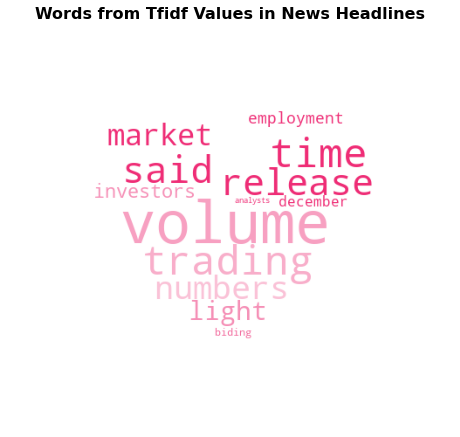

In [ ]:
# 뉴스 헤드라인 속 tfidf 값이 높은 단어들의 워드클라우드 생성

cloud_img = plt.imread('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/img/heart.jpg')

count = 0

for index in num_list:

  sentence = sample1[index]

  token_list = sentence.split()

  sentence_dict = {}

  for token in token_list:

    if token in tfidf_vectorizer.vocabulary_.keys():

      key = token
      value = tfidf_vectorizer.vocabulary_[key]

      sentence_dict[key] = value
  
  if len(sentence_dict) > 12:

    print('◎ News Headline : ', sample1[index])
    print()

    make_wc(cloud_img = cloud_img, score=sentence_dict)

  else:
    pass


> 2020 년 뉴스 헤드라인 데이터 분석

In [ ]:
# 뉴스 헤드라인 속 가중치가 높은 단어 분석 | sklearn 의 tfidf 활용

# 시작 시간 기록
start = time.time()


# tfidf 값 계산 

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf = tfidf_vectorizer.fit(sample2)
tfidf_matrix = tfidf.transform(sample2).toarray()


# 경과 시간 계산 
processing_time = time.time() - start
times = str(datetime.timedelta(seconds = processing_time))
print(times)


0:00:00.108082


In [ ]:
# "Article dataframe" vocabulary 분석
  
print('◎ 사용된 전체 단어 수 = ', len(list(tfidf_vectorizer.vocabulary_)))
print()  
  
print('◎ 사용된 전체 단어 리스트 = ', tfidf_vectorizer.vocabulary_)
print()

print('◎ tfidf 값이 높은 순서대로 정렬한 단어 리스트 = ', sorted(tfidf_vectorizer.vocabulary_.items(), reverse=True))
print()

◎ 사용된 전체 단어 수 =  5163

◎ 사용된 전체 단어 리스트 =  {'muzak': 3063, 'holdings': 2222, 'bankrupt': 529, 'elevator': 1601, 'music': 3056, 'provider': 3629, 'filed': 1863, 'reorganization': 3854, 'plan': 3435, 'delaware': 1329, 'bankruptcy': 531, 'court': 1198, 'reduce': 3780, 'debt': 1295, 'bank': 525, 'america': 296, 'chief': 915, 'executive': 1733, 'kenneth': 2565, 'lewis': 2704, 'said': 4036, 'company': 1055, 'talks': 4603, 'officials': 3187, 'compensate': 1059, 'government': 2075, 'prior': 3554, 'loss': 2780, 'sharing': 4201, 'agreement': 238, 'according': 140, 'letter': 2696, 'released': 3820, 'watchdog': 5025, 'lawmaker': 2648, 'thursday': 4708, 'barrick': 543, 'gold': 2058, 'proceeds': 3571, 'pending': 3374, 'equity': 1676, 'offering': 3179, 'total': 4751, 'billion': 604, 'making': 2821, 'stock': 4441, 'sale': 4040, 'biggest': 601, 'canadian': 781, 'history': 2214, 'thomson': 4695, 'reuters': 3939, 'data': 1268, 'french': 1960, 'finance': 1868, 'minister': 2964, 'christine': 931, 'lagarde':

◎ News Headline :  morgan stanley chief john j. mack — his bank and reputation smarting from the financial crisis — is bequeathing his post to a relative newcomer: james p. gorman.



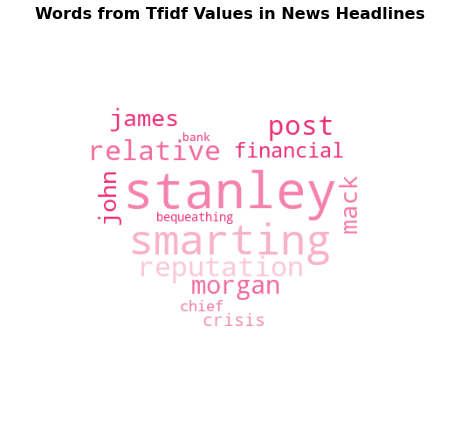

◎ News Headline :  an article on thursday about sultan munadi, a former member of the kabul bureau staff of the new york times who had recently rejoined the paper temporarily as an interpreter and was killed on sept. 9, misstated the circumstances behind his resigna...



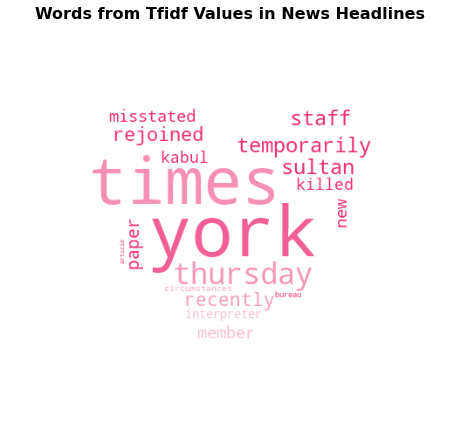

◎ News Headline :  kraft foods said tuesday that, contrary to a newspaper report, it does not need to sell any of its brands to afford its $16 billion bid for british confectioner cadbury.



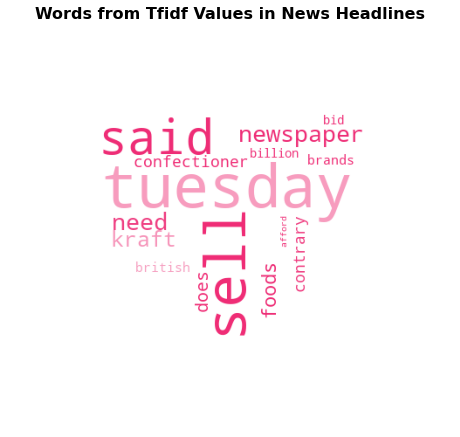

◎ News Headline :  the private equity financier guy hands, perhaps best known for his ill-timed $4.73 billion purchase of the record company emi, has an unvarnished view of the past, present and future of the industry, andrew ross sorkin writes in his column.



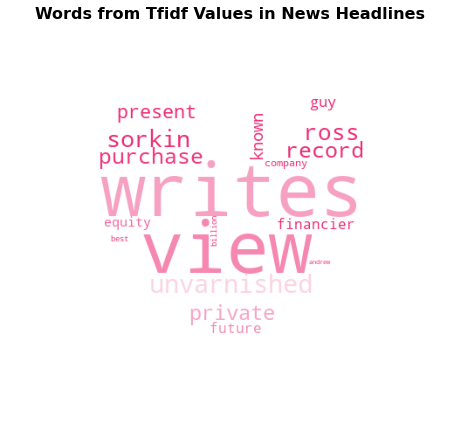

◎ News Headline :  wall street is paying close attention to the health care industry these days as a source of advisory and underwriting fees during the downturn.



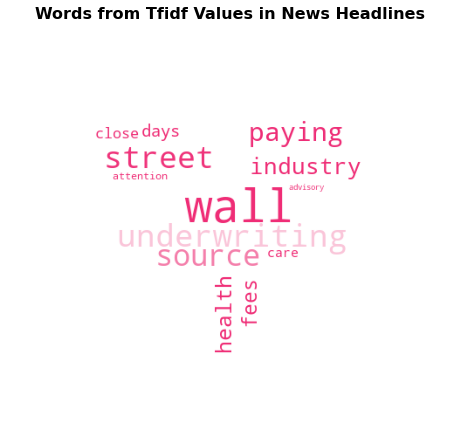

◎ News Headline :  iran and afghanistan weigh heavily on the administration’s agenda. meanwhile, the white house announced that the president will join his wife in copenhagen to pitch chicago as the site of the 2016 summer olympics.



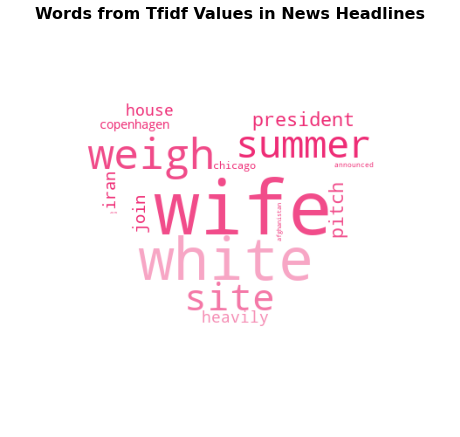

In [ ]:
# 뉴스 헤드라인 속 tfidf 값이 높은 단어들의 워드클라우드 생성

cloud_img = plt.imread('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/img/heart.jpg')

count = 0

for index in num_list:

  sentence = sample2[index]

  token_list = sentence.split()

  sentence_dict = {}

  for token in token_list:

    if token in tfidf_vectorizer.vocabulary_.keys():

      key = token
      value = tfidf_vectorizer.vocabulary_[key]

      sentence_dict[key] = value
  
  if len(sentence_dict) > 12:

    print('◎ News Headline : ', sample2[index])
    print()

    make_wc(cloud_img = cloud_img, score=sentence_dict)

  else:
    pass


**06. 거시경제 지표에 대한 데이터 수집**

> 파이썬 라이브러리 "FinanceDataReader" 를 활용한 데이터 수집

> 1) 다우지수 (DJI)
>
> 2) 달러/유로화 환율 (USD/EUR)
>
> 3) 금 (gold)

> 데이터 수집 기간
>
> • 2008.08 ~ 2009.12
>
> • 2020.01 ~ 2020.12

> ✽ to_csv('  ') → 파일경로 별도 설정 필요

In [ ]:
# DJI

df_dji_1 = fdr.DataReader('DJI', '2008', '2010')
df_dji_2 = fdr.DataReader('DJI', '2020', '2021')

df_dji_1 = df_dji_1[147:]

df_dji = pd.concat([df_dji_1,df_dji_2])

df_dji.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/dji.csv')


In [ ]:
# 데이터 수 확인

print('◎ row count of df : ', len(df_dji))


◎ row count of df :  611


In [ ]:
# 데이터 확인

df_dji.head()


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-08-01,11326.32,11379.89,11425.73,11267.05,189700000.0,-0.0045
2008-08-04,11284.15,11326.32,11382.17,11221.53,170250000.0,-0.0037
2008-08-05,11615.77,11286.02,11615.93,11286.02,234990000.0,0.0294
2008-08-06,11656.07,11603.64,11685.46,11521.32,180060000.0,0.0035
2008-08-07,11431.43,11655.42,11655.58,11416.70,229610000.0,-0.0193


In [ ]:
# 데이터 확인

df_dji.tail()


,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-12-24,30199.87,30155.92,30209.67,30099.30,146440000.0,0.0023
2020-12-28,30403.97,30283.23,30525.56,30283.23,303080000.0,0.0068
2020-12-29,30335.67,30492.07,30588.79,30274.24,358870000.0,-0.0022
2020-12-30,30409.56,30415.09,30525.35,30393.04,296140000.0,0.0024
2020-12-31,30606.48,30417.64,30637.47,30344.50,287060000.0,0.0065


In [ ]:
# USD/EUR

df_exr_1 = fdr.DataReader('USD/EUR', '2008-08-01','2010-01-01')
df_exr_2 = fdr.DataReader('USD/EUR', '2020-01-01','2021-01-01')

df_exr = pd.concat([df_exr_1,df_exr_2])

df_exr.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/exr.csv')


In [ ]:
# 데이터 수 확인

print('◎ row count of df : ', len(df_exr))


◎ row count of df :  634


In [ ]:
# 데이터 확인

df_exr.head()


,Close,Open,High,Low,Change
Date,,,,,
2008-08-01,0.6424,0.6410,0.6447,0.6409,0.0022
2008-08-04,0.6419,0.6422,0.6430,0.6396,-0.0008
2008-08-05,0.6470,0.6421,0.6473,0.6419,0.0079
2008-08-06,0.6487,0.6471,0.6495,0.6444,0.0026
2008-08-07,0.6526,0.6486,0.6532,0.6450,0.0060


In [ ]:
# 데이터 확인

df_exr.tail()


,Close,Open,High,Low,Change
Date,,,,,
2020-12-28,0.8184,0.8195,0.8210,0.8163,-0.0009
2020-12-29,0.8163,0.8185,0.8192,0.8146,-0.0026
2020-12-30,0.8131,0.8164,0.8166,0.8123,-0.0039
2020-12-31,0.8185,0.8131,0.8191,0.8123,0.0066
2021-01-01,0.8213,0.8235,0.8250,0.8183,0.0034


In [ ]:
# api key for quandl

quandl.ApiConfig.api_key = 'uPy7Xrd7A6aB_4s9GcH4'


In [ ]:
# gold

df_gold_1 = quandl.get('LBMA/GOLD', trim_start='2008-08-01', trim_end='2010-01-01')
df_gold_2 = quandl.get('LBMA/GOLD', trim_start='2020-01-01', trim_end='2021-01-01')

df_gold = pd.concat([df_gold_1,df_gold_2])

df_gold.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/gold.csv')


In [ ]:
# 데이터 수 확인

print('◎ row count of df : ', len(df_gold))


◎ row count of df :  613


In [ ]:
# 데이터 확인

df_gold.head()


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2008-08-01,909.50,912.50,459.738,461.838,584.249,585.950
2008-08-04,910.00,905.75,462.023,460.028,583.820,580.758
2008-08-05,884.00,882.00,451.873,451.082,570.543,569.473
2008-08-06,884.75,879.50,452.673,450.887,571.507,570.400
2008-08-07,882.50,871.50,452.193,448.718,570.311,567.531


In [ ]:
# 데이터 확인

df_gold.tail()


,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2020-12-23,1867.10,1875.0,1390.06,1382.44,1532.14,1535.06
2020-12-24,1872.55,NaN,1376.14,NaN,1535.87,NaN
2020-12-29,1873.90,1874.3,1388.93,1389.42,1529.66,1528.49
2020-12-30,1877.55,1887.6,1381.31,1387.39,1528.89,1535.19
2020-12-31,1891.10,NaN,1382.58,NaN,1539.92,NaN


**07. 주가 예측을 위한 데이터셋 생성**

> 1) 주가 예측 LSTM 모델용 데이터셋 생성
>
> - for_train | 학습용 데이터
> - for_test | 테스트용 데이터

> 2) 데이터셋 columns 구성
>
> - Date
> - posneg | 날짜 별 snippet(뉴스 헤드라인) Min-Max Scaling 한
> - exr | USD/EUR 환율의 open 값
> - gold | gold의 USD(AM) 값
> - DJI | 다우지수의 open 값
> - Close_DJI | 다우지수의 전날 close 값

> ✽ read_csv('  ') → 파일경로 별도 설정 필요
>
> ✽ to_csv('  ') → 파일경로 별도 설정 필요

In [ ]:
# import dataset | 긍부정 레이블이 포함된 뉴스 데이터셋

df_posneg = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/after_sentiment_analysis.csv')


In [ ]:
# 불필요한 column 삭제

del df_posneg['Unnamed: 0']


In [ ]:
# 데이터 확인

df_posneg.head()


,Date,Snippet,posneg
0,2008-08-01,A program started by John Edwards to pay a yea...,1
1,2008-08-01,This is not the first time that Paris Hilton a...,0
2,2008-08-01,The leaders of an effort to pressure Barack Ob...,1
3,2008-08-01,Lagging mobile phone sales continue to plague ...,0
4,2008-08-01,The Federal Reserve’s policy makers assume tha...,1


In [ ]:
# 데이터 확인

df_posneg.tail()


,Date,Snippet,posneg
297607,2021-01-01,"Up to 700 people lacking winter clothes, sleep...",0
297608,2021-01-01,The “billionaire millennial” Lin Qi was workin...,1
297609,2021-01-01,"Make yourself a Grown-Up Granita. For dinner, ...",1
297610,2021-01-01,The hackers gained more access than the compan...,0
297611,2021-01-01,After a year punctuated by a pandemic and unem...,1


In [ ]:
# 중복 값 확인

df_posneg['Snippet'].isnull().sum()


0

In [ ]:
# LSTM 에 적용시킬 새로운 데이터셋 생성

df_for_LSTM = pd.DataFrame()


In [ ]:
# "Date" column

date_list = list(df_posneg['Date'])

set_date_list = list(set(date_list))
set_date_list.sort()

print(set_date_list)

df_for_LSTM['Date'] = set_date_list


['2008-08-01', '2008-08-02', '2008-08-03', '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07', '2008-08-08', '2008-08-09', '2008-08-10', '2008-08-11', '2008-08-12', '2008-08-13', '2008-08-14', '2008-08-15', '2008-08-16', '2008-08-17', '2008-08-18', '2008-08-19', '2008-08-20', '2008-08-21', '2008-08-22', '2008-08-23', '2008-08-24', '2008-08-25', '2008-08-26', '2008-08-27', '2008-08-28', '2008-08-29', '2008-08-30', '2008-08-31', '2008-09-01', '2008-09-02', '2008-09-03', '2008-09-04', '2008-09-05', '2008-09-06', '2008-09-07', '2008-09-08', '2008-09-09', '2008-09-10', '2008-09-11', '2008-09-12', '2008-09-13', '2008-09-14', '2008-09-15', '2008-09-16', '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-20', '2008-09-21', '2008-09-22', '2008-09-23', '2008-09-24', '2008-09-25', '2008-09-26', '2008-09-27', '2008-09-28', '2008-09-29', '2008-09-30', '2008-10-01', '2008-10-02', '2008-10-03', '2008-10-04', '2008-10-05', '2008-10-06', '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10', '2008

In [ ]:
# 날짜 별 긍부정 레이블 평균 값 계산 후 하나의 데이터프레임으로 생성

df_mean = df_posneg.groupby('Date').mean()


In [ ]:
df_mean.shape

(886, 1)

In [ ]:
# 데이터 확인

df_mean.head()


,posneg
Date,
2008-08-01,0.895954
2008-08-02,0.935018
2008-08-03,0.955224
2008-08-04,0.838150
2008-08-05,0.880435


In [ ]:
# 데이터 확인

df_mean.tail()


,posneg
Date,
2020-12-28,0.684211
2020-12-29,0.733333
2020-12-30,0.625000
2020-12-31,0.846154
2021-01-01,0.700000


In [ ]:
# Min-Max Scaling

scalar = MinMaxScaler()

# min-max 값 학습

scalar.fit(df_mean)

# min-max scaling

after_mms = scalar.transform(df_mean)

after_mms_list = []

for i in range(len(after_mms)):

  value = after_mms[i][0]

  after_mms_list.append(value)

print('posneg after min-max scaling | ', after_mms_list)

# 기존 데이터프레임에 min-max scaling 한 값 추가 | df_mean 에 "posneg_mms" column 추가]

df_mean['poneg_mms'] = after_mms_list


posneg after min-max scaling |  [0.8383567299752273, 0.899045899948427, 0.9304371002132197, 0.7485549132947977, 0.8142468944099379, 0.8895238095238096, 0.7644174473067915, 0.6830506450071667, 0.8786272321428572, 0.6263562386980108, 0.9357142857142857, 0.8004587155963303, 0.8622720364741643, 0.8774647887323943, 0.8572085084033614, 0.7631750871080138, 0.9642857142857144, 0.8462335446123841, 0.8553732303732304, 0.7758269415148611, 0.8646125116713352, 0.8489583333333333, 0.8260927505330491, 0.7638571428571428, 0.8624707259953162, 0.885204081632653, 0.8036215890850722, 0.7410714285714286, 0.7377603215199122, 0.9603680758017492, 0.9324534161490683, 0.9051810865191148, 0.8237082066869299, 0.8640625, 0.7362637362637363, 0.8459268004722551, 0.8486263736263737, 0.4862204724409449, 0.9000918695452458, 0.9514508928571428, 0.7017142857142857, 0.8800330943188086, 0.8305194805194804, 0.9392458100558658, 0.9676339285714286, 0.8755426203630625, 0.9044935597189696, 0.7331288343558282, 0.7417656070471084

In [ ]:
# 데이터 확인

df_mean.shape


(886, 2)

In [ ]:
# 데이터 확인

df_mean.head()


,posneg,poneg_mms
Date,,
2008-08-01,0.895954,0.838357
2008-08-02,0.935018,0.899046
2008-08-03,0.955224,0.930437
2008-08-04,0.838150,0.748555
2008-08-05,0.880435,0.814247


In [ ]:
# "posneg" column

posneg_list = list(df_mean['poneg_mms'])

df_for_LSTM['posneg'] = posneg_list


In [ ]:
# 데이터 확인

df_for_LSTM.head()


,Date,posneg
0,2008-08-01,0.838357
1,2008-08-02,0.899046
2,2008-08-03,0.930437
3,2008-08-04,0.748555
4,2008-08-05,0.814247


In [ ]:
# DJI

df_dji = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/dji.csv')


In [ ]:
# 필요한 column 만 추출

def extract_dji_df(df):

  date_list = list(df['Date'])
  value_open_list = list(df['Open'])

  dji_df = pd.DataFrame()

  dji_df['Date'] = date_list
  dji_df['DJI'] = value_open_list

  return dji_df


In [ ]:

dji = extract_dji_df(df_dji)


In [ ]:
# 데이터 확인 및 DJI "close" column 추가

value_close_list = list(df_dji['Close'])[:610]
value_close_list.insert(0, 0)

dji["Close_DJI"] = value_close_list


In [ ]:
# 데이터 확인

dji


,Date,DJI,Close_DJI
0,2008-08-01,11379.89,0.00
1,2008-08-04,11326.32,11326.32
2,2008-08-05,11286.02,11284.15
3,2008-08-06,11603.64,11615.77
4,2008-08-07,11655.42,11656.07
...,...,...,...
606,2020-12-24,30155.92,30129.83
607,2020-12-28,30283.23,30199.87
608,2020-12-29,30492.07,30403.97
609,2020-12-30,30415.09,30335.67


In [ ]:
# exchange rate (USD/EUR)

df_exr = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/exr.csv')


In [ ]:
# 필요한 column 만 추출

def extract_exr_df(df):

  date_list = list(df['Date'])
  value_list = list(df['Open'])

  exr_df = pd.DataFrame()

  exr_df['Date'] = date_list
  exr_df['exr'] = value_list

  return exr_df


In [ ]:

exr = extract_exr_df(df_exr)


In [ ]:
# gold

df_gold = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/financial/gold.csv')


In [ ]:
# 필요한 column 만 추출

def extract_gold_df(df):

  date_list = list(df['Date'])
  value_list = list(df['USD (AM)'])

  gold_df = pd.DataFrame()

  gold_df['Date'] = date_list
  gold_df['gold'] = value_list

  return gold_df


In [ ]:

gold = extract_gold_df(df_gold)


In [ ]:
# 데이터 확인 : DJI

dji.head()


,Date,DJI,Close_DJI
0,2008-08-01,11379.89,0.00
1,2008-08-04,11326.32,11326.32
2,2008-08-05,11286.02,11284.15
3,2008-08-06,11603.64,11615.77
4,2008-08-07,11655.42,11656.07


In [ ]:
# 데이터 확인 : exr

exr.head()


,Date,exr
0,2008-08-01,0.6410
1,2008-08-04,0.6422
2,2008-08-05,0.6421
3,2008-08-06,0.6471
4,2008-08-07,0.6486


In [ ]:
# 데이터 확인 : gold

gold.head()


,Date,gold
0,2008-08-01,909.50
1,2008-08-04,910.00
2,2008-08-05,884.00
3,2008-08-06,884.75
4,2008-08-07,882.50


In [ ]:
# 최종 dataframe 에 value 값 병합 : DJI

df_for_LSTM = pd.merge(df_for_LSTM, dji)


In [ ]:
# 최종 dataframe 에 value 값 병합 : exr

df_for_LSTM = pd.merge(df_for_LSTM, exr)


In [ ]:
# 최종 dataframe 에 value 값 병합 : gold

df_for_LSTM = pd.merge(df_for_LSTM, gold)


In [ ]:
# 최종 dataframe columns 순서 변경

df_for_LSTM = df_for_LSTM[['Date', 'posneg', 'exr', 'gold', 'DJI', 'Close_DJI']]


In [ ]:
# 데이터 확인

df_for_LSTM.head()


,Date,posneg,exr,gold,DJI,Close_DJI
0,2008-08-01,0.838357,0.6410,909.50,11379.89,0.00
1,2008-08-04,0.748555,0.6422,910.00,11326.32,11326.32
2,2008-08-05,0.814247,0.6421,884.00,11286.02,11284.15
3,2008-08-06,0.889524,0.6471,884.75,11603.64,11615.77
4,2008-08-07,0.764417,0.6486,882.50,11655.42,11656.07


In [ ]:
# 데이터 확인

df_for_LSTM.tail()


,Date,posneg,exr,gold,DJI,Close_DJI
596,2020-12-23,0.492711,0.8221,1867.10,30046.73,30015.51
597,2020-12-24,0.621080,0.8205,1872.55,30155.92,30129.83
598,2020-12-29,0.585714,0.8185,1873.90,30492.07,30403.97
599,2020-12-30,0.417411,0.8164,1877.55,30415.09,30335.67
600,2020-12-31,0.760989,0.8131,1891.10,30417.64,30409.56


In [ ]:
# 최종 데이터프레임 둘로 나누기
# 1) LSTM train | 2008 ~ 2009
# 2) LSTM test | 2020

df_for_train = df_for_LSTM[:352]
df_for_test = df_for_LSTM[352:]


In [ ]:
# 훈련용 데이터 확인

df_for_train.head()


,Date,posneg,exr,gold,DJI,Close_DJI
0,2008-08-01,0.838357,0.6410,909.50,11379.89,0.00
1,2008-08-04,0.748555,0.6422,910.00,11326.32,11326.32
2,2008-08-05,0.814247,0.6421,884.00,11286.02,11284.15
3,2008-08-06,0.889524,0.6471,884.75,11603.64,11615.77
4,2008-08-07,0.764417,0.6486,882.50,11655.42,11656.07


In [ ]:
# 훈련용 데이터 확인

df_for_train.tail()


,Date,posneg,exr,gold,DJI,Close_DJI
347,2009-12-23,0.469512,0.7016,1080.5,10464.32,10464.93
348,2009-12-24,0.608108,0.6974,1104.5,10467.12,10466.44
349,2009-12-29,0.502857,0.6955,1103.0,10547.83,10547.08
350,2009-12-30,0.523906,0.6967,1092.5,10544.36,10545.41
351,2009-12-31,0.435065,0.6973,1104.0,10548.51,10548.51


In [ ]:
# 테스트용 데이터 확인

df_for_test.head()


,Date,posneg,exr,gold,DJI,Close_DJI
352,2020-01-02,0.413747,0.8919,1520.55,28638.97,10428.05
353,2020-01-03,0.790391,0.8951,1547.40,28553.33,28868.80
354,2020-01-06,0.638704,0.8954,1576.85,28465.50,28634.88
355,2020-01-07,0.672932,0.8932,1566.50,28639.18,28703.38
356,2020-01-08,0.386014,0.8967,1582.85,28556.14,28583.68


In [ ]:
# 테스트용 데이터 확인

df_for_test.tail()


,Date,posneg,exr,gold,DJI,Close_DJI
596,2020-12-23,0.492711,0.8221,1867.10,30046.73,30015.51
597,2020-12-24,0.621080,0.8205,1872.55,30155.92,30129.83
598,2020-12-29,0.585714,0.8185,1873.90,30492.07,30403.97
599,2020-12-30,0.417411,0.8164,1877.55,30415.09,30335.67
600,2020-12-31,0.760989,0.8131,1891.10,30417.64,30409.56


In [ ]:
# save as each csv files

df_for_train.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_train.csv')
df_for_test.to_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_test.csv')


**08. 거시경제 지표에 대한 데이터 시각화**

In [ ]:
# import dataset

df_2008 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_train.csv')
df_2020 = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_test.csv')


In [ ]:
# Function

# 거시 경제지표 별 데이터 시각화 함수

def visualization(category, df1, df2):

  length = len(df2)

  x = [x for x in range(length)]
  y_1 = df1[category][:length]
  y_2 = df2[category]

  sns.lineplot(x, y_1, label='2008', color='blue')
  sns.lineplot(x, y_2, label='2020', color='red')

  title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
  }

  plt.title(category, fontdict=title_font)

  plt.xlabel('time', fontsize=12)
  plt.ylabel('price', fontsize=12)

  plt.show()


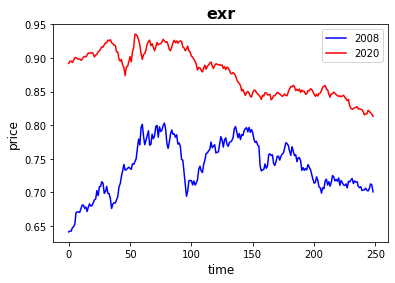

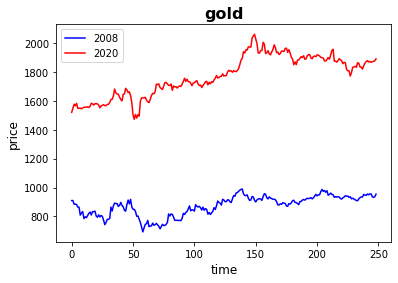

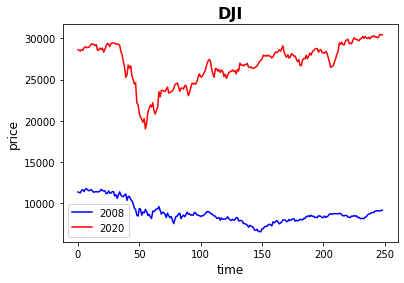

In [ ]:
# 각 거시 경제지표 별 데이터 시각화

visualization('exr', df_2008, df_2020)
visualization('gold', df_2008, df_2020)
visualization('DJI', df_2008, df_2020)


**09. LSTM 모델을 활용해 주가 예측 모델 설계 및 구현**
> - 2008 ~ 2009년 데이터 | 훈련 데이터
> - 2020년 데이터 | 예측 데이터

> 1) 훈련 데이터 DJI 지수 분포 확인 | matplotlib 을 활용한 시각화
>
> 2) LSTM 모델 구현 및 학습
>
> 3) LSTM 모델을 활용한 2020년 주가 지수의 예측
>
> 4) 예측 결과와 실제 값과의 비교 | matplotlib 을 활용한 시각화

In [ ]:
# import datasets

df_train = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_train.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/융합소프트웨어프로젝트/project/data/for_test.csv')


In [ ]:
# 데이터 확인

print('◎ 훈련용 데이터 형태 확인 | ', df_train.shape)
print()

df_train.head()


◎ 훈련용 데이터 형태 확인 |  (352, 7)



,Unnamed: 0,Date,posneg,exr,gold,DJI,Close_DJI
0,0,2008-08-01,0.838357,0.6410,909.50,11379.89,0.00
1,1,2008-08-04,0.748555,0.6422,910.00,11326.32,11326.32
2,2,2008-08-05,0.814247,0.6421,884.00,11286.02,11284.15
3,3,2008-08-06,0.889524,0.6471,884.75,11603.64,11615.77
4,4,2008-08-07,0.764417,0.6486,882.50,11655.42,11656.07


In [ ]:
# 훈련용 데이터 "index[0]" 값 변경

df_train['Close_DJI'][0] = 11378.02


In [ ]:
# 데이터 확인

df_train.head()


,Unnamed: 0,Date,posneg,exr,gold,DJI,Close_DJI
0,0,2008-08-01,0.838357,0.6410,909.50,11379.89,11378.02
1,1,2008-08-04,0.748555,0.6422,910.00,11326.32,11326.32
2,2,2008-08-05,0.814247,0.6421,884.00,11286.02,11284.15
3,3,2008-08-06,0.889524,0.6471,884.75,11603.64,11615.77
4,4,2008-08-07,0.764417,0.6486,882.50,11655.42,11656.07


In [ ]:
# 데이터 확인

df_test = df_test[1:]

print('◎ 테스트용 데이터 형태 확인 | ', df_test.shape)
print()

df_test.head()


◎ 테스트용 데이터 형태 확인 |  (248, 7)



,Unnamed: 0,Date,posneg,exr,gold,DJI,Close_DJI
1,353,2020-01-03,0.790391,0.8951,1547.40,28553.33,28868.80
2,354,2020-01-06,0.638704,0.8954,1576.85,28465.50,28634.88
3,355,2020-01-07,0.672932,0.8932,1566.50,28639.18,28703.38
4,356,2020-01-08,0.386014,0.8967,1582.85,28556.14,28583.68
5,357,2020-01-09,0.686147,0.9005,1547.85,28851.97,28745.09


In [ ]:
# 데이터셋 columns 순서 변경

col = df_train.columns.to_numpy()

col = col[[5,1,2,3,4,6]]

df_train = df_train[col]
df_test = df_test[col]


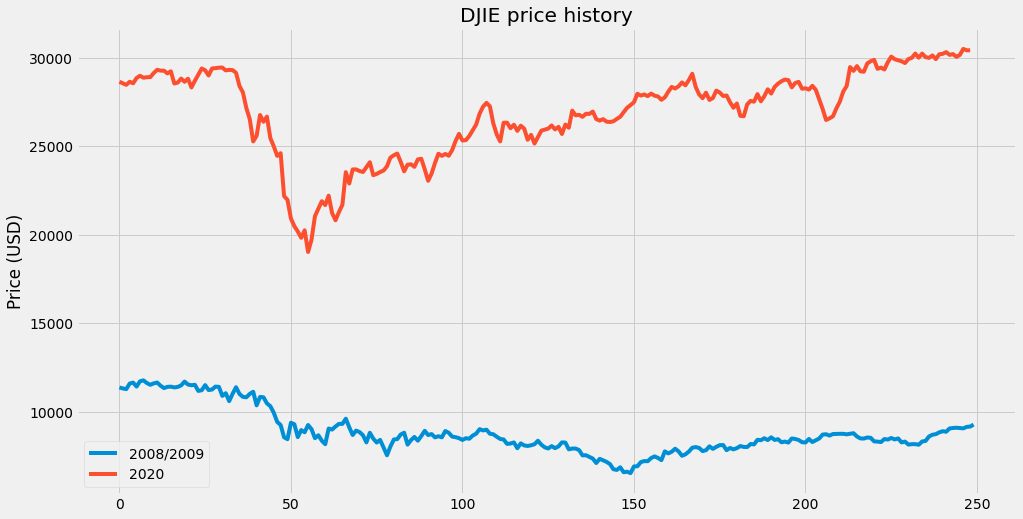

In [ ]:
# DJI 시각화

plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

plt.plot(df_train['DJI'][:250], label='2008/2009')
plt.plot(df_test['DJI'], label='2020')

plt.title('DJIE price history')

plt.ylabel('Price (USD)')

plt.legend()

plt.show()


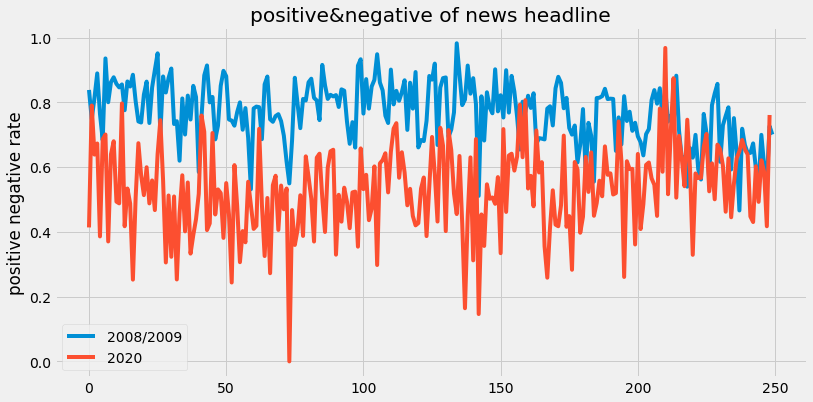

In [ ]:
# news headline posneg 시각화

plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')

plt.plot(df_train['posneg'][:250], label='2008/2009')
plt.plot(df_test['posneg'], label='2020')

plt.title('positive&negative of news headline')

plt.ylabel('positive negative rate')

plt.legend()

plt.show()

In [ ]:
# 훈련용 데이터 확인

df_train.head()


,DJI,Date,posneg,exr,gold,Close_DJI
0,11379.89,2008-08-01,0.838357,0.6410,909.50,11378.02
1,11326.32,2008-08-04,0.748555,0.6422,910.00,11326.32
2,11286.02,2008-08-05,0.814247,0.6421,884.00,11284.15
3,11603.64,2008-08-06,0.889524,0.6471,884.75,11615.77
4,11655.42,2008-08-07,0.764417,0.6486,882.50,11656.07


In [ ]:
# Function

# LSTM 모델용 데이터셋 구축

def make_dataset(data, label, window_size=5):

  feature_list = []
  label_list = []

  for i in range(len(data) - window_size):

    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))

  return np.array(feature_list), np.array(label_list)


> "window_size" 파라미터 값을 20 -> 10 -> 5 로 변경하면서 모델 학습 진행
>
> => 파라미터 값이 줄어들수록 더욱 정교하게 예측 값 도출

In [ ]:
# 데이터셋 columns 분리

feature_cols = ['posneg',	'exr',	'gold', 'Close_DJI']
label_cols = ['DJI']

train_feature = df_train[feature_cols]
train_label = df_train[label_cols]

test_feature = df_test[feature_cols]
test_label = df_test[label_cols]


In [ ]:
# LSTM 학습을 위한 데이터셋 분리
# 1) 훈련용 데이터셋
# 2) 테스트용 데이터셋

X_train, y_train = make_dataset(train_feature, train_label, 4)
X_test, y_test = make_dataset(test_feature, test_label, 4)

X_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
# EarlyStopping / ReduceLROnPlateau / ModelCheckpoint 설정

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)


In [ ]:
# LSTM 모델 구현

model = Sequential()

model.add(LSTM(units=10,
               activation = 'relu',
               return_sequences=True, 
               input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.1))

# Adding 2nd LSTM layer
model.add(LSTM(units=20, activation = 'relu', return_sequences=True))

# Adding Dropout
model.add(Dropout(0.2))

model.add(LSTM(units=30, activation = 'relu'))

# Output layer
model.add(Dropout(0.3))

model.add(Dense(units=1))


In [ ]:
# Model compile

model.compile(optimizer = Adam(learning_rate=0.01), loss='mean_squared_error')

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 10)             600       
                                                                 
 dropout_6 (Dropout)         (None, 4, 10)             0         
                                                                 
 lstm_7 (LSTM)               (None, 4, 20)             2480      
                                                                 
 dropout_7 (Dropout)         (None, 4, 20)             0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                6120      
                                                                 
 dropout_8 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
# Model 파라미터 설정 및 fit

num_epochs = 100
batch_size = 4

h1 = model.fit(X_train, y_train, epochs = num_epochs, batch_size = batch_size, callbacks=[es, rlr, mcp], validation_data=(x_valid, y_valid))


Epoch 1/100
69/70 [============================>.] - ETA: 0s - loss: 27586762.0000
Epoch 1: val_loss improved from inf to 3197173.75000, saving model to weights.h5
70/70 [==============================] - 5s 34ms/step - loss: 27500136.0000 - val_loss: 3197173.7500 - lr: 0.0100
Epoch 2/100
69/70 [============================>.] - ETA: 0s - loss: 7290469.5000
Epoch 2: val_loss did not improve from 3197173.75000
70/70 [==============================] - 2s 27ms/step - loss: 7283982.0000 - val_loss: 6287009.0000 - lr: 0.0100
Epoch 3/100
70/70 [==============================] - ETA: 0s - loss: 6343743.5000
Epoch 3: val_loss did not improve from 3197173.75000
70/70 [==============================] - 2s 27ms/step - loss: 6343743.5000 - val_loss: 8779659.0000 - lr: 0.0100
Epoch 4/100
70/70 [==============================] - ETA: 0s - loss: 5402136.5000
Epoch 4: val_loss did not improve from 3197173.75000
70/70 [==============================] - 2s 26ms/step - loss: 5402136.5000 - val_loss: 5160

In [ ]:
# LSTM 모델을 활용한 주가 지수 예측

y_pred = model.predict(X_test, verbose=1)


8/8 [==============================] - 0s 4ms/step


In [ ]:
# 데이터 형태 확인

y_pred.shape


(244, 1)

In [ ]:
# 데이터 형태 확인

y_test.shape


(244, 1)

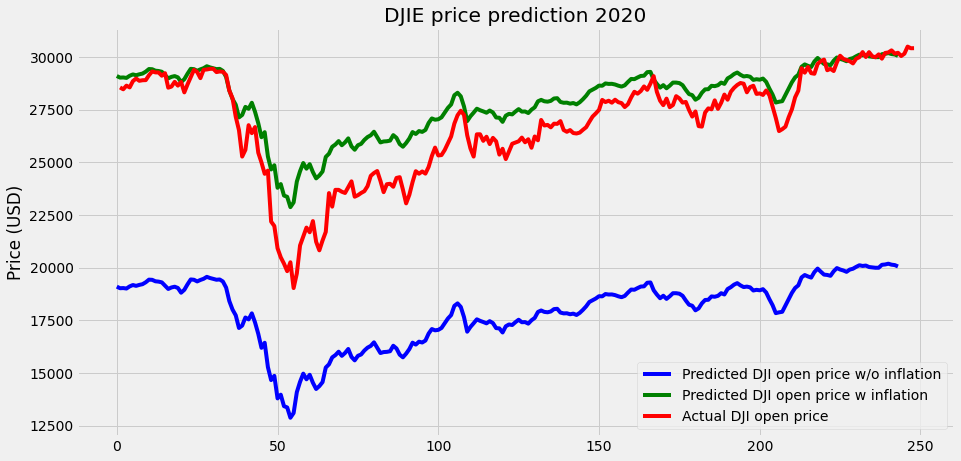

In [ ]:
# LSTM 을 활용한 예측값과 실제값을 그래프로 시각화

plt.figure(figsize=(14,7))

plt.plot(y_pred, color = 'blue', label = 'Predicted DJI open price w/o inflation')
plt.plot(y_pred+10000, color = 'green', label = 'Predicted DJI open price w inflation')
plt.plot(test_label, color= 'red', label = 'Actual DJI open price')

plt.title('DJIE price prediction 2020')

plt.ylabel('Price (USD)')

plt.legend()

plt.show()


**10. 프로젝트 결과 분석**
1. 프로젝트 결과 분석
2. 프로젝트의 의의 및 한계점

1. **프로젝트 결과 분석**

> `뉴스 헤드라인 긍부정 레이블과 DJI 분포의 시각화 그래프`
>
> - "DJIE price history" | 2008 ~ 2009 년 & 2020년 의 다우지수 변동폭을 나타낸 라인 그래프
> - "positive&negative of news headline" | 2008 ~ 2009 년 & 2020년 의 뉴스 헤드라인 긍부정 점수의 변동폭을 나타낸 라인 그래프
>
> 1) 뉴스 헤드라인의 긍부정 점수 분포는 다우지수의 등락과 유의미한 상관관계를 가지지 않는다는 것을 알 수 있다. 다시 말하면, 뉴스 헤드라인 점수는 대체적으로 일정하게 유지되고 있는 반면 다우지수는 특정 시기에 하락하고 있는 것을 그래프를 통해 확인할 수 있다.
>
> 2) 그러나 뉴스 헤드라인 점수의 편차는 다우지수 변동 폭과 비례하는 것을 확인할 수 있다. 2008-2009년의 뉴스 헤드라인 긍부정 점수에 비해 2020년의 긍부정 점수가 대체적으로 낮고 최저점과 최고점의 편차가 큰 것을 알 수 있다. 특히, 편차가 심했던 시기에 다우지수를 확인해보면 다른 시기보다 상대적으로 더욱 크게 등락하는 것을 확인할 수 있다. 


> `LSTM 을 활용한 주가 예측 그래프`
> - "DJIE price prediction 2020" | LSTM 모델로 예측한 다우지수와 실제 값을 그린 라인 그래프
>
> 1) 그래프 속 파란색 라인은 LSTM 모델을 활용해 단순 예측한 2020년의 주가 지수이고, 초록색 라인은 예측한 주가 지수에 물가상승률을 더한 값을 나타낸다. 빨간색 라인은 실제 2020년 DJI 값을 나타낸다.
>
> 2) 실제 데이터와 비교해보면 예측 데이터의 정확한 값에는 차이가 있지만 데이터의 흐름은 실제 데이터와 거의 동일하게 이어진다.
>
> 3) 예측 그래프를 통해 뉴스 데이터의 긍부정 정도와 다양한 거시경제 지표 (환율, 금)가 다우주가 지수에 긍정적인 영향을 미치는 것을 확인할 수 있다.
>
> 4) 실제 데이터와 예측된 다우지수는 유사한 형태를 띄지만 절대적인 수치에는 편차가 크다. 이는 10년 사이 물가 상승으로 인한 절대적인 수치의 차이로 판단했고, 그래프 상에서 실제 데이터와 유사한 값을 가질 수 있도록 임의로 상수를 예측값에 더해서 초록색 라인도 함께 나타내었다.


2. **프로젝트의 의의 및 한계점**

> 프로젝트를 진행하면서 뉴스 헤드라인의 긍부정 레이블이 실제 다우지수의 등락에 영향을 주지는 않지만 점수의 분포에 따라 다우지수 등락 폭에는 유의미한 영향을 미칠 수 있다는 것을 확인했다. 단순히 다우지수와 뉴스는 양의 상관관계를 가질 것이라는 가설을 실제 데이터를 통해 일부는 입증할 수 있었다는 점에서 매우 유익했던 프로젝트이다. 그러나 2008년과 2020년 사이의 약 10년 간의 시간은 물가 상승뿐만 아니라 다양한 거시경제 지표에도 큰 영향을 미친 긴 기간이라는 것을 간과했던 것이 정확한 예측값보다 다우지수의 등락의 추세만을 보일 수 밖에 없었다는 점이 가장 아쉽다. 기회가 된다면, 기간의 확장과 추가적인 거시경제 지표를 활용해 정확한 예측치를 반환할 수 있는 프로젝트를 진행하고 싶다.